## A first neural network in Keras

### General imports

In [1]:
% matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np
import random as rn
import os

### First step is to load data from file and plot a few examples

In [2]:
train_x = pickle.load(open("MNIST_train_x.pkl", 'rb'))
train_y = pickle.load(open("MNIST_train_y.pkl", 'rb'))
test_x = pickle.load(open("MNIST_test_x.pkl", 'rb'))
test_y = pickle.load(open("MNIST_test_y.pkl", 'rb'))
print("Data stats")
print(type(train_x))
print(train_x.shape)
print(type(train_y))
print(train_y.shape)
print(type(test_x))
print(test_x.shape)
print(type(test_y))
print(test_y.shape)

# Creating subset of training data to speed up training
train_x_short = train_x[:20000]
train_y_short = train_y[:20000]
print("Short training data size")
print(train_x_short.shape)
print(train_y_short.shape)

Data stats
<class 'numpy.ndarray'>
(60000, 784)
<class 'numpy.ndarray'>
(60000, 10)
<class 'numpy.ndarray'>
(10000, 784)
<class 'numpy.ndarray'>
(10000, 10)
Short training data size
(20000, 784)
(20000, 10)


In [3]:
def plotExamples(data, labels, model_predict):
    plt.figure(figsize=(8,5))
    for i in range(8):
        sub = 241 + i
        ax = plt.subplot(sub)
        index = np.random.randint(0, data.shape[0])
        ax.set_title("num: " + str(np.argmax(labels[index])) + "," + str(np.argmax(model_predict[index])))
        im = np.reshape(data[index], (28, 28))
        plt.imshow(im, cmap="gray")
    plt.show()

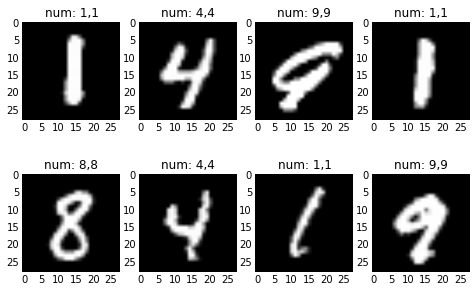

In [4]:
# Currently we are just duplicating the correct labels
# When we have a model we can plot both the correct and predicted labels
plotExamples(train_x, train_y, train_y)

### Building a first Keras model
- Simple 3 layer feedforward network
- Three steps: 
    - Build model
    - Compile model setting the optimizer and loss 
        - Note models can be recompiled without affecting the stored value of weights and biases. This means that if you want to change your learning rate or optimizer during training, you simply recompile and call model.fit again
    - Train the model by calling model.fit

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [6]:
'''
First step is to initialize your model
Keras has two types of models 
    1. Sequential - easier to work with, suitable for most tasks
    2. Functional API - useful for defining complex models
'''
model = Sequential()

'''Then, define your model architecture'''

'''
Add a fully connected hidden layer with 128 nodes. 
When you add your first layer, Keras implicitly adds the input layer, 
so you need to specify the dimension of your inputs
'''
model.add(Dense(128, input_dim=784))
'''Specify your activation function for this layer'''
model.add(Activation('sigmoid'))
'''Add an output layer with 10 output nodes'''
model.add(Dense(10))
'''Specify your activation function for this layer'''
model.add(Activation('sigmoid'))

'''
Next, compile your model. This defines two critical features
    1. Optimizer - how your model learns
    2. Loss function - how your model defines the error between
       the correct output and its prediction
Here you can also specify the metrics you want to use to evaluate your model's performance
'''
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

'''
Finally, train your model. 
To train, a model needs input data, and the corresponding correct outputs
You can also specify the batch size and number of training epochs
'''
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, verbose=2)

Epoch 1/10
2s - loss: 0.1131 - acc: 0.1982
Epoch 2/10
2s - loss: 0.0810 - acc: 0.3878
Epoch 3/10
1s - loss: 0.0744 - acc: 0.4783
Epoch 4/10
1s - loss: 0.0691 - acc: 0.5483
Epoch 5/10
1s - loss: 0.0643 - acc: 0.6161
Epoch 6/10
1s - loss: 0.0600 - acc: 0.6742
Epoch 7/10
1s - loss: 0.0562 - acc: 0.7189
Epoch 8/10
1s - loss: 0.0528 - acc: 0.7510
Epoch 9/10
1s - loss: 0.0500 - acc: 0.7719
Epoch 10/10
1s - loss: 0.0474 - acc: 0.7903


In [7]:
# Print model information
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 128)           100480      dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 128)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            1290        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 10)            0           dense_2[0][0]                    
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
___________________

### Example of recompiling a model
 - This allows you to change the settings of the optimizer and loss function if you wish, without affecting the values of the weights and biases
 - It can be useful for reducing the learning rate if your model performance has plateaued
 - This example also illustrates the validation_split option of the fit function. It holds out a specified proportion of your training data for evaluating model performance as it trains. 
     - This enables you to tune your hyperparameters and model architecture without polluting the test data

In [8]:
model = Sequential()
model.add(Dense(128, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('sigmoid'))

sgd = SGD(lr=0.1)
print("Learning rate is 0.1")
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, verbose=2, validation_split=0.2)
print()
sgd = SGD(lr=0.01)
print("Learning rate is 0.01")
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, verbose=2, validation_split=0.2)
print()
sgd = SGD(lr=0.001)
print("Learning rate is 0.001")
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, verbose=2, validation_split=0.2)

Learning rate is 0.1
Train on 16000 samples, validate on 4000 samples
Epoch 1/10
1s - loss: 0.0702 - acc: 0.5591 - val_loss: 0.0513 - val_acc: 0.7528
Epoch 2/10
1s - loss: 0.0434 - acc: 0.8055 - val_loss: 0.0379 - val_acc: 0.8323
Epoch 3/10
1s - loss: 0.0340 - acc: 0.8509 - val_loss: 0.0314 - val_acc: 0.8600
Epoch 4/10
1s - loss: 0.0289 - acc: 0.8717 - val_loss: 0.0278 - val_acc: 0.8745
Epoch 5/10
1s - loss: 0.0255 - acc: 0.8853 - val_loss: 0.0250 - val_acc: 0.8880
Epoch 6/10
2s - loss: 0.0232 - acc: 0.8938 - val_loss: 0.0233 - val_acc: 0.8905
Epoch 7/10
1s - loss: 0.0214 - acc: 0.9014 - val_loss: 0.0215 - val_acc: 0.8968
Epoch 8/10
1s - loss: 0.0199 - acc: 0.9079 - val_loss: 0.0202 - val_acc: 0.9050
Epoch 9/10
1s - loss: 0.0190 - acc: 0.9111 - val_loss: 0.0195 - val_acc: 0.9045
Epoch 10/10
1s - loss: 0.0180 - acc: 0.9146 - val_loss: 0.0190 - val_acc: 0.9052

Learning rate is 0.01
Train on 16000 samples, validate on 4000 samples
Epoch 1/10
1s - loss: 0.0170 - acc: 0.9191 - val_loss: 0.

### Helper function to calculate model accuracy on the test data

In [9]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    num_correct = np.argmax(result, axis=1)==np.argmax(test_y, axis=1)
    accuracy = 1.0 * np.sum(num_correct) / result.shape[0]
    print("Accuracy on data is: {}%".format(accuracy * 100))

In [10]:
accuracy(test_x, test_y, model)

Accuracy on data is: 91.19%


### Plotting some examples the model got right and wrong

In [11]:
def get_correct_and_incorrect(model, test_x, test_y):
    result = model.predict(test_x)
    correct_indices = np.argmax(result, axis=1)==np.argmax(test_y, axis=1)
    test_x_correct = test_x[correct_indices]
    test_y_correct = test_y[correct_indices]
    predict_test_y_correct = result[correct_indices]
    incorrect_indices = np.argmax(result, axis=1)!=np.argmax(test_y, axis=1)
    test_x_incorrect = test_x[incorrect_indices]
    test_y_incorrect = test_y[incorrect_indices]
    predict_test_y_incorrect = result[incorrect_indices]
    return test_x_correct, test_y_correct, test_x_incorrect, test_y_incorrect, predict_test_y_correct, predict_test_y_incorrect

In [12]:
test_x_correct, test_y_correct, test_x_incorrect, test_y_incorrect, predict_test_y_correct, predict_test_y_incorrect \
        = get_correct_and_incorrect(model, test_x, test_y)

(9119, 784)


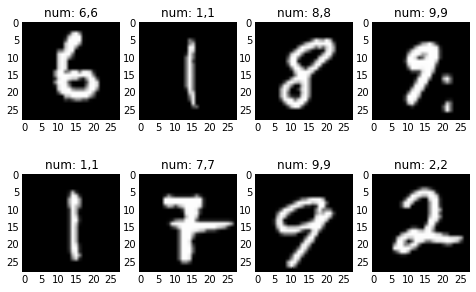

In [13]:
print(test_x_correct.shape)
plotExamples(test_x_correct, test_y_correct, predict_test_y_correct)

(881, 784)


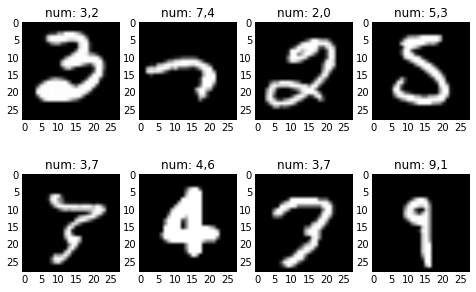

In [14]:
print(test_x_incorrect.shape)
plotExamples(test_x_incorrect, test_y_incorrect, predict_test_y_incorrect)

### Quadratic cost (mean squared error) vs. categorical crossentropy loss functions
- Categorical cross-entropy significantly speeds up training
- Softmax output layers are the most appropriate for the MNIST problem since each image can only belong to one class and softmax outputs a proability distribution across the 10 classes.
    - As the value of one output node increases, the value of one or more other output nodes must decrease
    - This is consistent with our intuition that as we become more confident and image belongs to one class, we reduce our confidence that an image belongs to other classes

In [15]:
# Softmax output layer, mse
print("Quadratic (MSE)")
model = Sequential()
model.add(Dense(128, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, validation_split=0.2, verbose=2)
print()

# Softmax output layer, categorical crossentropy
print("Categorical cross entropy")
model = Sequential()
model.add(Dense(128, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, validation_split=0.2, verbose=2)

Quadratic (MSE)
Train on 16000 samples, validate on 4000 samples
Epoch 1/10
1s - loss: 0.0909 - acc: 0.1697 - val_loss: 0.0845 - val_acc: 0.2682
Epoch 2/10
1s - loss: 0.0802 - acc: 0.3307 - val_loss: 0.0752 - val_acc: 0.3837
Epoch 3/10
1s - loss: 0.0713 - acc: 0.4464 - val_loss: 0.0676 - val_acc: 0.4880
Epoch 4/10
1s - loss: 0.0636 - acc: 0.5590 - val_loss: 0.0609 - val_acc: 0.5985
Epoch 5/10
1s - loss: 0.0570 - acc: 0.6482 - val_loss: 0.0549 - val_acc: 0.6767
Epoch 6/10
1s - loss: 0.0512 - acc: 0.7044 - val_loss: 0.0499 - val_acc: 0.7245
Epoch 7/10
1s - loss: 0.0467 - acc: 0.7382 - val_loss: 0.0460 - val_acc: 0.7460
Epoch 8/10
1s - loss: 0.0430 - acc: 0.7666 - val_loss: 0.0427 - val_acc: 0.7628
Epoch 9/10
1s - loss: 0.0399 - acc: 0.7880 - val_loss: 0.0399 - val_acc: 0.7827
Epoch 10/10
1s - loss: 0.0373 - acc: 0.8011 - val_loss: 0.0376 - val_acc: 0.8020

Categorical cross entropy
Train on 16000 samples, validate on 4000 samples
Epoch 1/10
2s - loss: 1.0579 - acc: 0.7222 - val_loss: 0.6

## ReLU vs. Sigmoid

## ReLU observations
- Needs a low learning rate for the network to learn anything
- Performs worse than a sigmoid hidden layer for shallow networks

In [16]:
# Relu hidden layer, 3 layer network
model = Sequential()
model.add(Dense(128, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, validation_split=0.2, verbose=2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
1s - loss: 8.2963 - acc: 0.4763 - val_loss: 6.5138 - val_acc: 0.5900
Epoch 2/10
1s - loss: 6.2309 - acc: 0.6084 - val_loss: 5.9705 - val_acc: 0.6238
Epoch 3/10
1s - loss: 5.9151 - acc: 0.6275 - val_loss: 5.6660 - val_acc: 0.6450
Epoch 4/10
1s - loss: 5.7698 - acc: 0.6377 - val_loss: 5.7038 - val_acc: 0.6428
Epoch 5/10
1s - loss: 5.6468 - acc: 0.6462 - val_loss: 5.6158 - val_acc: 0.6480
Epoch 6/10
1s - loss: 4.8566 - acc: 0.6931 - val_loss: 4.4491 - val_acc: 0.7170
Epoch 7/10
1s - loss: 4.2163 - acc: 0.7333 - val_loss: 4.1931 - val_acc: 0.7342
Epoch 8/10
1s - loss: 4.1796 - acc: 0.7356 - val_loss: 4.1977 - val_acc: 0.7352
Epoch 9/10
1s - loss: 4.0648 - acc: 0.7437 - val_loss: 4.1912 - val_acc: 0.7355
Epoch 10/10
1s - loss: 3.9823 - acc: 0.7489 - val_loss: 4.0752 - val_acc: 0.7425


In [17]:
# Sigmoid hidden layer, 3 layer network
model = Sequential()
model.add(Dense(128, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, validation_split=0.2, verbose=2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
2s - loss: 1.0958 - acc: 0.7184 - val_loss: 0.6784 - val_acc: 0.8365
Epoch 2/10
1s - loss: 0.5652 - acc: 0.8634 - val_loss: 0.5088 - val_acc: 0.8718
Epoch 3/10
1s - loss: 0.4603 - acc: 0.8865 - val_loss: 0.4381 - val_acc: 0.8848
Epoch 4/10
1s - loss: 0.4050 - acc: 0.8953 - val_loss: 0.3932 - val_acc: 0.8965
Epoch 5/10
1s - loss: 0.3693 - acc: 0.9050 - val_loss: 0.3669 - val_acc: 0.9052
Epoch 6/10
1s - loss: 0.3502 - acc: 0.9067 - val_loss: 0.3545 - val_acc: 0.9025
Epoch 7/10
1s - loss: 0.3373 - acc: 0.9112 - val_loss: 0.3498 - val_acc: 0.9060
Epoch 8/10
1s - loss: 0.3139 - acc: 0.9183 - val_loss: 0.3270 - val_acc: 0.9127
Epoch 9/10
1s - loss: 0.2968 - acc: 0.9190 - val_loss: 0.3119 - val_acc: 0.9135
Epoch 10/10
1s - loss: 0.2860 - acc: 0.9216 - val_loss: 0.2951 - val_acc: 0.9207


### Relu really comes into its own for deep networks
- Deeper networks tend to perform better than shallow networks for complex tasks
- But they are hard to train. Relu's make it easier for deep networks to learn because their gradients don't saturate for postive inputs

In [18]:
# Relu hidden layer, 6 layer network
model = Sequential()
model.add(Dense(512, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, validation_split=0.2, verbose=2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
5s - loss: 5.3639 - acc: 0.6270 - val_loss: 2.7688 - val_acc: 0.8010
Epoch 2/10
5s - loss: 2.4974 - acc: 0.8111 - val_loss: 2.3703 - val_acc: 0.8187
Epoch 3/10
5s - loss: 2.0889 - acc: 0.8433 - val_loss: 2.0847 - val_acc: 0.8390
Epoch 4/10
5s - loss: 1.8942 - acc: 0.8627 - val_loss: 2.0077 - val_acc: 0.8415
Epoch 5/10
5s - loss: 1.7963 - acc: 0.8728 - val_loss: 1.9446 - val_acc: 0.8475
Epoch 6/10
6s - loss: 1.7390 - acc: 0.8814 - val_loss: 1.9296 - val_acc: 0.8470
Epoch 7/10
5s - loss: 1.7031 - acc: 0.8886 - val_loss: 1.8980 - val_acc: 0.8480
Epoch 8/10
5s - loss: 0.5803 - acc: 0.9389 - val_loss: 0.4020 - val_acc: 0.9307
Epoch 9/10
5s - loss: 0.1485 - acc: 0.9747 - val_loss: 0.4105 - val_acc: 0.9277
Epoch 10/10
5s - loss: 0.0885 - acc: 0.9861 - val_loss: 0.3829 - val_acc: 0.9343


In [19]:
# Sigmoid hidden layer, 6 layer network
model = Sequential()
model.add(Dense(512, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(64))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, validation_split=0.2, verbose=2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
5s - loss: 2.3135 - acc: 0.1196 - val_loss: 2.2912 - val_acc: 0.2127
Epoch 2/10
5s - loss: 2.2861 - acc: 0.1484 - val_loss: 2.2810 - val_acc: 0.1557
Epoch 3/10
5s - loss: 2.2729 - acc: 0.1751 - val_loss: 2.2670 - val_acc: 0.2157
Epoch 4/10
6s - loss: 2.2558 - acc: 0.2354 - val_loss: 2.2458 - val_acc: 0.2908
Epoch 5/10
5s - loss: 2.2287 - acc: 0.3181 - val_loss: 2.2129 - val_acc: 0.2923
Epoch 6/10
5s - loss: 2.1830 - acc: 0.3937 - val_loss: 2.1513 - val_acc: 0.3867
Epoch 7/10
5s - loss: 2.0984 - acc: 0.4267 - val_loss: 2.0410 - val_acc: 0.4012
Epoch 8/10
5s - loss: 1.9623 - acc: 0.4733 - val_loss: 1.8882 - val_acc: 0.5108
Epoch 9/10
5s - loss: 1.8034 - acc: 0.5217 - val_loss: 1.7315 - val_acc: 0.5132
Epoch 10/10
5s - loss: 1.6362 - acc: 0.5634 - val_loss: 1.5609 - val_acc: 0.6058


### Putting everything together and training on all the data

In [20]:
# Relu hidden layer, 6 layer network
model = Sequential()
model.add(Dense(1024, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=32, nb_epoch=15, validation_split=0.2, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_23 (Dense)                 (None, 1024)          803840      dense_input_9[0][0]              
____________________________________________________________________________________________________
activation_23 (Activation)       (None, 1024)          0           dense_23[0][0]                   
____________________________________________________________________________________________________
dense_24 (Dense)                 (None, 512)           524800      activation_23[0][0]              
____________________________________________________________________________________________________
activation_24 (Activation)       (None, 512)           0           dense_24[0][0]                   
___________________________________________________________________________________________

### Model performance on the training data

In [21]:
accuracy(train_x, train_y, model)

Accuracy on data is: 99.21833333333333%


In [22]:
train_x_correct, train_y_correct, train_x_incorrect, train_y_incorrect, predict_train_y_correct, predict_train_y_incorrect \
        = get_correct_and_incorrect(model, train_x, train_y)

(59531, 784)


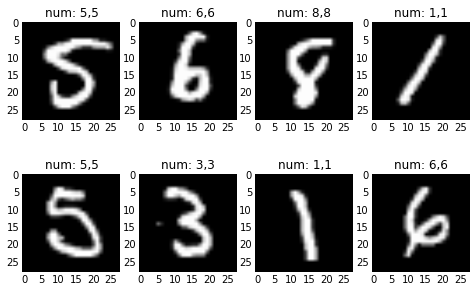

In [23]:
print(train_x_correct.shape)
plotExamples(train_x_correct, train_y_correct, predict_train_y_correct)

(469, 784)


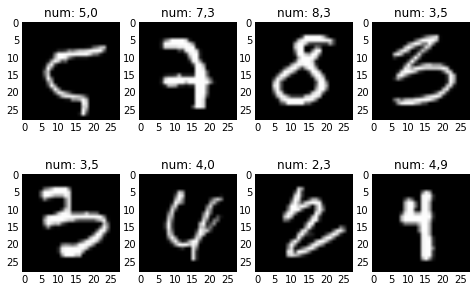

In [24]:
print(train_x_incorrect.shape)
plotExamples(train_x_incorrect, train_y_incorrect, predict_train_y_incorrect)

### Model performance on the test data

In [25]:
accuracy(test_x, test_y, model)

Accuracy on data is: 96.57%


In [26]:
test_x_correct, test_y_correct, test_x_incorrect, test_y_incorrect, predict_test_y_correct, predict_test_y_incorrect \
        = get_correct_and_incorrect(model, test_x, test_y)

(9657, 784)


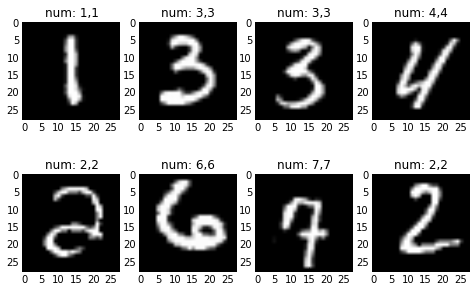

In [27]:
print(test_x_correct.shape)
plotExamples(test_x_correct, test_y_correct, predict_test_y_correct)

(343, 784)


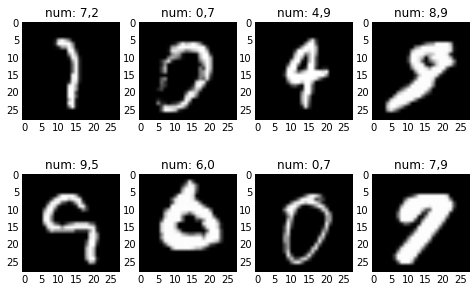

In [28]:
print(test_x_incorrect.shape)
plotExamples(test_x_incorrect, test_y_incorrect, predict_test_y_incorrect)